In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from dance.delens import Delens


MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [4]:
delens_iso_l = Delens(basedir,2048,6,True,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096)
delens_iso_g = Delens(basedir,2048,6,False,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


Caching sky fractions...


CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


Caching sky fractions...


CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [5]:
delens_iso_l.recon.get_n1(0)

n1: rank 0 doing L 1 kA pee kB pee kind p
n1: rank 0 doing L 2 kA pee kB pee kind p
n1: rank 0 doing L 3 kA pee kB pee kind p
n1: rank 0 doing L 4 kA pee kB pee kind p
n1: rank 0 doing L 5 kA pee kB pee kind p
n1: rank 0 doing L 6 kA pee kB pee kind p
n1: rank 0 doing L 7 kA pee kB pee kind p
n1: rank 0 doing L 8 kA pee kB pee kind p
n1: rank 0 doing L 9 kA pee kB pee kind p
n1: rank 0 doing L 10 kA pee kB pee kind p
n1: rank 0 doing L 21 kA pee kB pee kind p
n1: rank 0 doing L 41 kA pee kB pee kind p
n1: rank 0 doing L 61 kA pee kB pee kind p
n1: rank 0 doing L 81 kA pee kB pee kind p
n1: rank 0 doing L 101 kA pee kB pee kind p
n1: rank 0 doing L 121 kA pee kB pee kind p
n1: rank 0 doing L 141 kA pee kB pee kind p
n1: rank 0 doing L 161 kA pee kB pee kind p
n1: rank 0 doing L 181 kA pee kB pee kind p
n1: rank 0 doing L 201 kA pee kB pee kind p
n1: rank 0 doing L 221 kA pee kB pee kind p
n1: rank 0 doing L 241 kA pee kB pee kind p
n1: rank 0 doing L 261 kA pee kB pee kind p
n1: rank 0 

array([0.00000000e+00, 4.47134069e-09, 1.37860317e-10, ...,
       1.72211964e-22, 1.71222099e-22, 1.70234100e-22])

In [7]:
cl_g = delens_iso_g.delens_cl(0)

In [28]:
cl_l = delens_iso_l.delens_cl(0)

In [29]:
cmb = delens_iso_g.wf.cmb.get_cb_lensed_spectra(0.35,False,)['eb']

In [30]:
sky = delens_iso_g.wf.mysims.sky

In [31]:
cl_d_g = hp.alm2cl(sky.get_E(0),sky.get_B(0))

In [32]:
cl_dif = cl_g - cl_d_g

(1000, 3000)

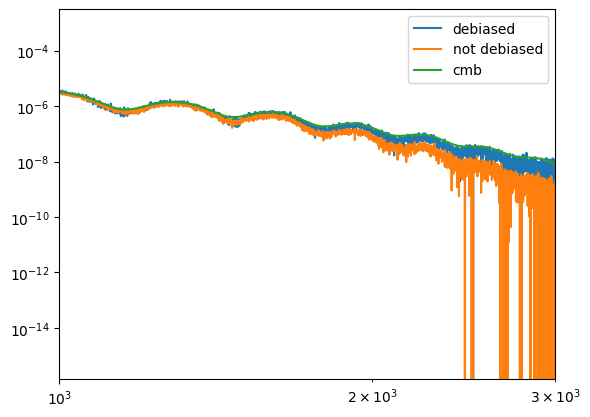

In [33]:
plt.loglog(cl_l-cl_dif,label='debiased')
plt.loglog(cl_l,label='not debiased')

plt.loglog(cmb,label='cmb')
plt.legend()
plt.xlim(1000,3000)

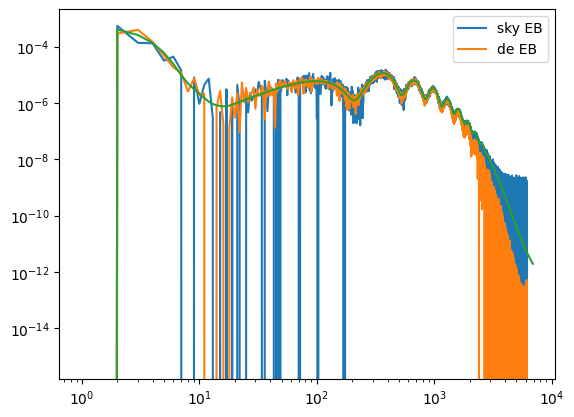

In [26]:
plt.loglog(hp.alm2cl(sky.get_E(0),sky.get_B(0)),label='sky EB')
plt.loglog(hp.alm2cl(e,b),label='de EB')
plt.loglog(cmb)
plt.legend()

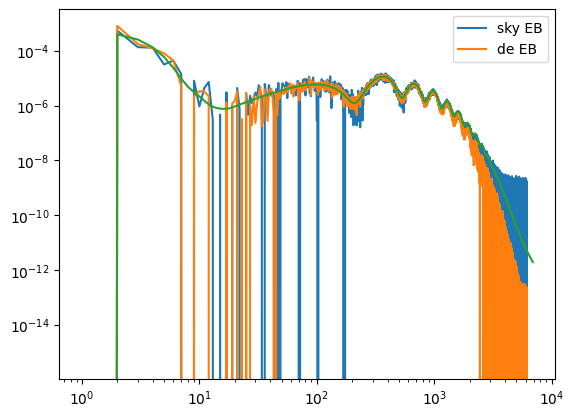

In [19]:
plt.loglog(hp.alm2cl(sky.get_E(0),sky.get_B(0)),label='sky EB')
plt.loglog(hp.alm2cl(e,b),label='de EB')
plt.loglog(cmb)
plt.legend()

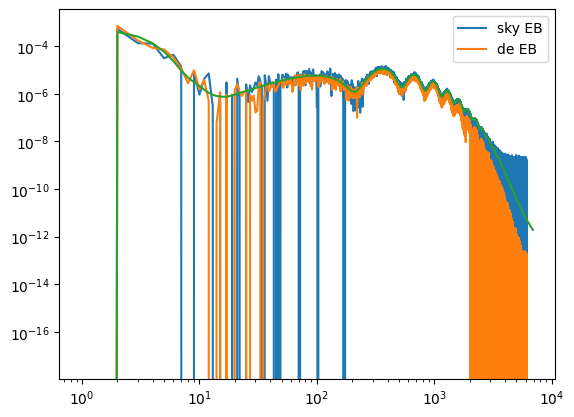

In [17]:
#plt.loglog(hp.alm2cl(e),label='de E')
#plt.loglog(hp.alm2cl(b),label='de B')
#plt.loglog(hp.alm2cl(sky.get_B(0)),label='sky E')
#plt.loglog(hp.alm2cl(sky.get_B(0)),label='sky B')
plt.loglog(hp.alm2cl(sky.get_E(0),sky.get_B(0)),label='sky EB')
plt.loglog(hp.alm2cl(e,b),label='de EB')
plt.loglog(cmb)
plt.legend()